# Matematika Jadi Fondasi Utama Belajar Data: Emang Iya?

## 1. Aljabar Linear

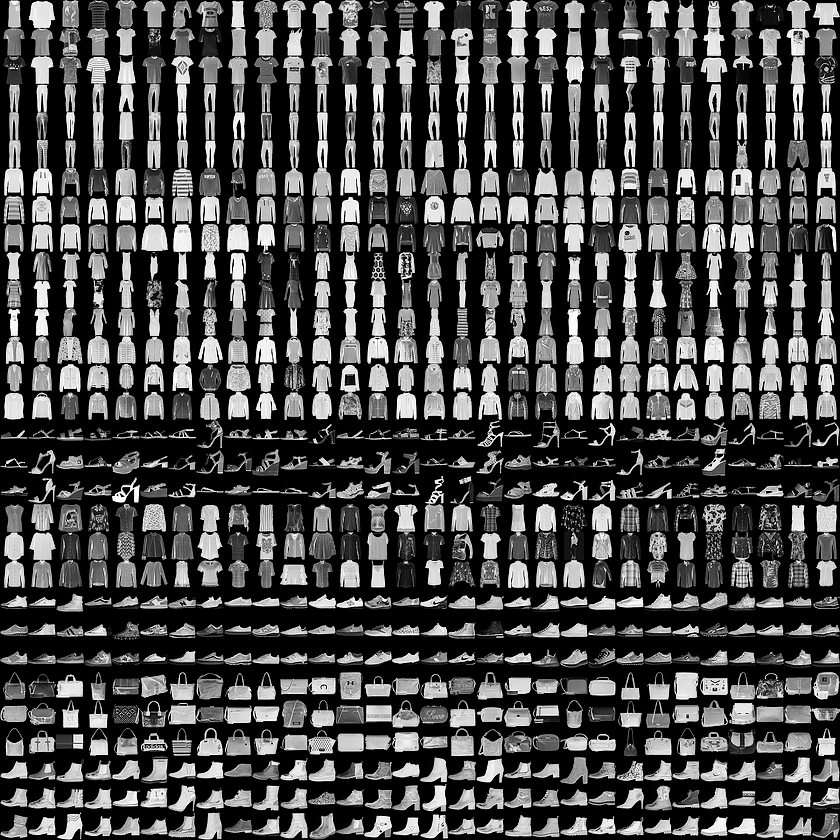

 ### 1.1 Bandingkan dengan Tensorflow https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Untuk demo kita jangan pakai semua data, katakanlah kita hanya pakai 50000 data saja

X_train = train_images[:5000]
y_train = train_labels[:5000]

X_test = test_images[:5000]
y_test = test_labels[:5000]

In [ ]:
X_train.shape

(5000, 28, 28)

In [ ]:
# kita perlu mengubah bentuk dataset menjadi (5000, 784) untuk training (5000, 784) untuk test
# Dan kita perlu normalisasi Bagaima
# X_train = X_train.reshape(_, _) / _
# X_test = X_test.reshape(_, _) / _

X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [ ]:
# Seharusnya Akan seperti ini bentuk matriksnya

print(X_train.shape)
print(X_test.shape)

(5000, 784)
(5000, 784)


In [ ]:
# Melakukan One Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


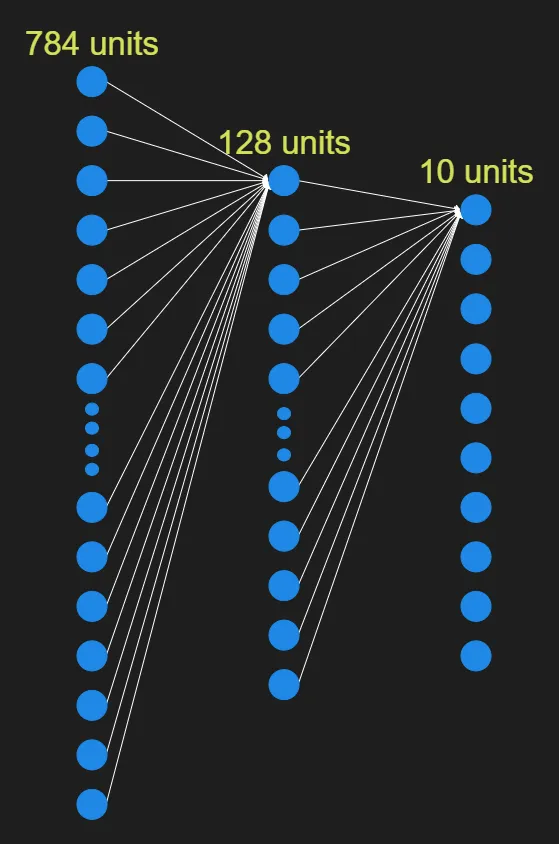

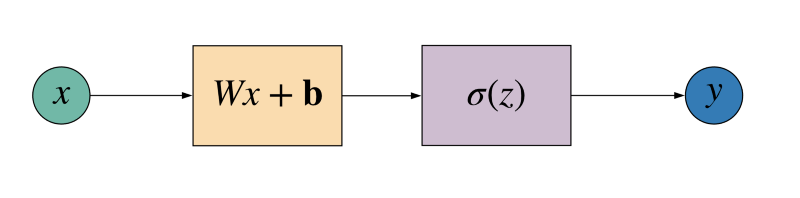

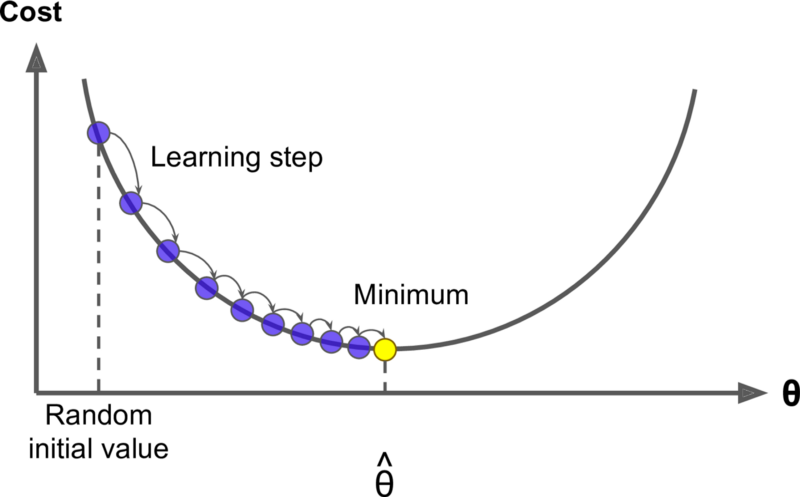

https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/

In [ ]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate, epochs):

        # Initialisasi Variable Input
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.epochs = epochs

        # Bobot dari Input Layer menuju Hidden Layer
        self.wih = np.random.normal(0.0, pow(self.input_neurons, -0.5), (self.hidden_neurons, self.input_neurons))
        self.bih = 0

        # Bobot dari Hidden Layer menuju Output Layer
        self.who = np.random.normal(0.0, pow(self.hidden_neurons, -0.5), (self.output_neurons, self.hidden_neurons))
        self.bho = 0

        self.lr = learning_rate # Learning rate

    def activation(self, z):
        """Fungsi Aktivasi Sigmoid z"""
        z = np.clip(z, -500, 500) # Menghindari Overflow error

        # HINT: sigmoid(x) = 1 / 1 + e^-x
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """Turunan Sigmoid z"""

        return self.activation(z) * (1 - self.activation(z))

    # Forward propagation
    def forward(self, input_list):
        inputs = np.array(input_list, ndmin=2).T

        # Passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)

        # Passing inputs from the hidden layer to the output layer
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        # Getting output from the output layer
        yj = self.activation(final_inputs)

        # Luaran dari output layer
        yj = self.activation(final_inputs)



        return yj


    # Back propagation
    def backprop(self, inputs_list, targets_list):

        inputs = np.array(inputs_list, ndmin=2).T

        tj = np.array(targets_list, ndmin=2).T # Targets

        # Passing inputs to the hidden layer
        hidden_inputs = np.dot(self.wih, inputs) + self.bih

        # Getting outputs from the hidden layer
        hidden_outputs = self.activation(hidden_inputs)

        # Passing inputs from the hidden layer to the output layer
        final_inputs = np.dot(self.who, hidden_outputs) + self.bho

        # Getting output from the output layer
        yj = self.activation(final_inputs)

        # Mencari error pada output layer
        output_errors = -(tj - yj)

        # Mencari error pada hidden layer
        hidden_errors = np.dot(self.who.T, output_errors)

        # Memperbaharui bobot
        self.who -= self.lr * np.dot((output_errors * self.sigmoid_derivative(yj)), np.transpose(hidden_outputs))
        self.wih -= self.lr * np.dot((hidden_errors * self.sigmoid_derivative(hidden_outputs)), np.transpose(inputs))


        # Memperbaharui bias
        self.bho -= self.lr * (output_errors * self.sigmoid_derivative(yj))
        self.bih -= self.lr * (hidden_errors * self.sigmoid_derivative(hidden_outputs))
        pass

    # Melakukan Gradient Descent Optimization dalam Backpropagation
    def fit(self, inputs_list, targets_list):
        for epoch in range(self.epochs):
            self.backprop(inputs_list, targets_list)
            print(f"Epoch {epoch}/{self.epochs} completed.")

    def predict(self, X):
        outputs = self.forward(X).T
        return outputs

In [ ]:
nn = NN(input_neurons=784, hidden_neurons=128, output_neurons=10, learning_rate=0.01, epochs=100)
nn.fit(X_train, y_train)

Epoch 0/100 completed.
Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Ep

In [ ]:
# Prediksi probabilitas
probs = nn.predict(X_test)


# Konversi probabilitas menjadi One Hot Vector
predictions = []

for prob in probs:
    max_idx = np.argmax(prob)
    prediction = np.zeros_like(prob)
    prediction[max_idx] = 1
    predictions.append(prediction)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:",accuracy_score(predictions, y_test))
print("CR:", classification_report(predictions, y_test))

Accuracy: 0.5824
CR:               precision    recall  f1-score   support

           0       0.61      0.80      0.69       383
           1       0.92      0.92      0.92       479
           2       0.11      0.86      0.19        65
           3       0.68      0.81      0.74       419
           4       0.74      0.48      0.59       798
           5       0.00      0.25      0.00         4
           6       0.44      0.21      0.28      1014
           7       0.90      0.52      0.66       875
           8       0.52      0.97      0.67       279
           9       0.93      0.65      0.76       684

   micro avg       0.58      0.58      0.58      5000
   macro avg       0.58      0.65      0.55      5000
weighted avg       0.71      0.58      0.61      5000
 samples avg       0.58      0.58      0.58      5000



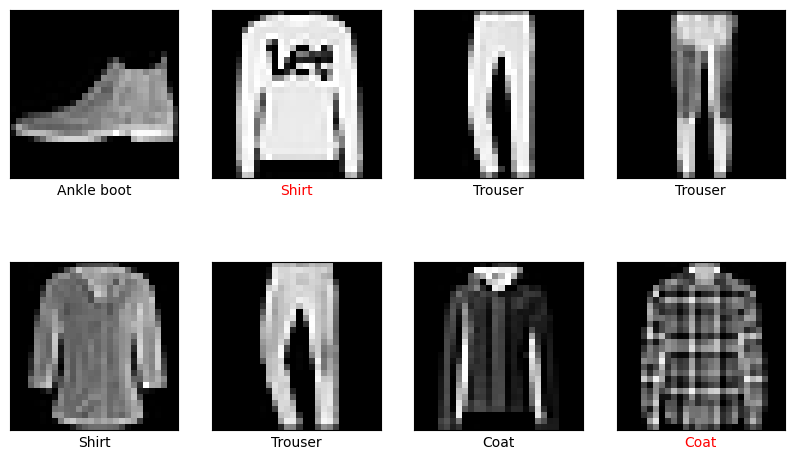

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img_data = X_test[i].reshape((28, 28))
    # Tampilkan gambar
    ax.imshow(img_data, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    index = np.where(predictions[i] == 1)[0][0]
    label = class_names[index]
    true_label = class_names[np.argmax(y_test[i])]
    if label != true_label: # Kalau prediksi salah label menjadi merah
        ax.set_xlabel(label, color='r')
    else:
        ax.set_xlabel(label)
plt.show()

## 2. Kalkulus

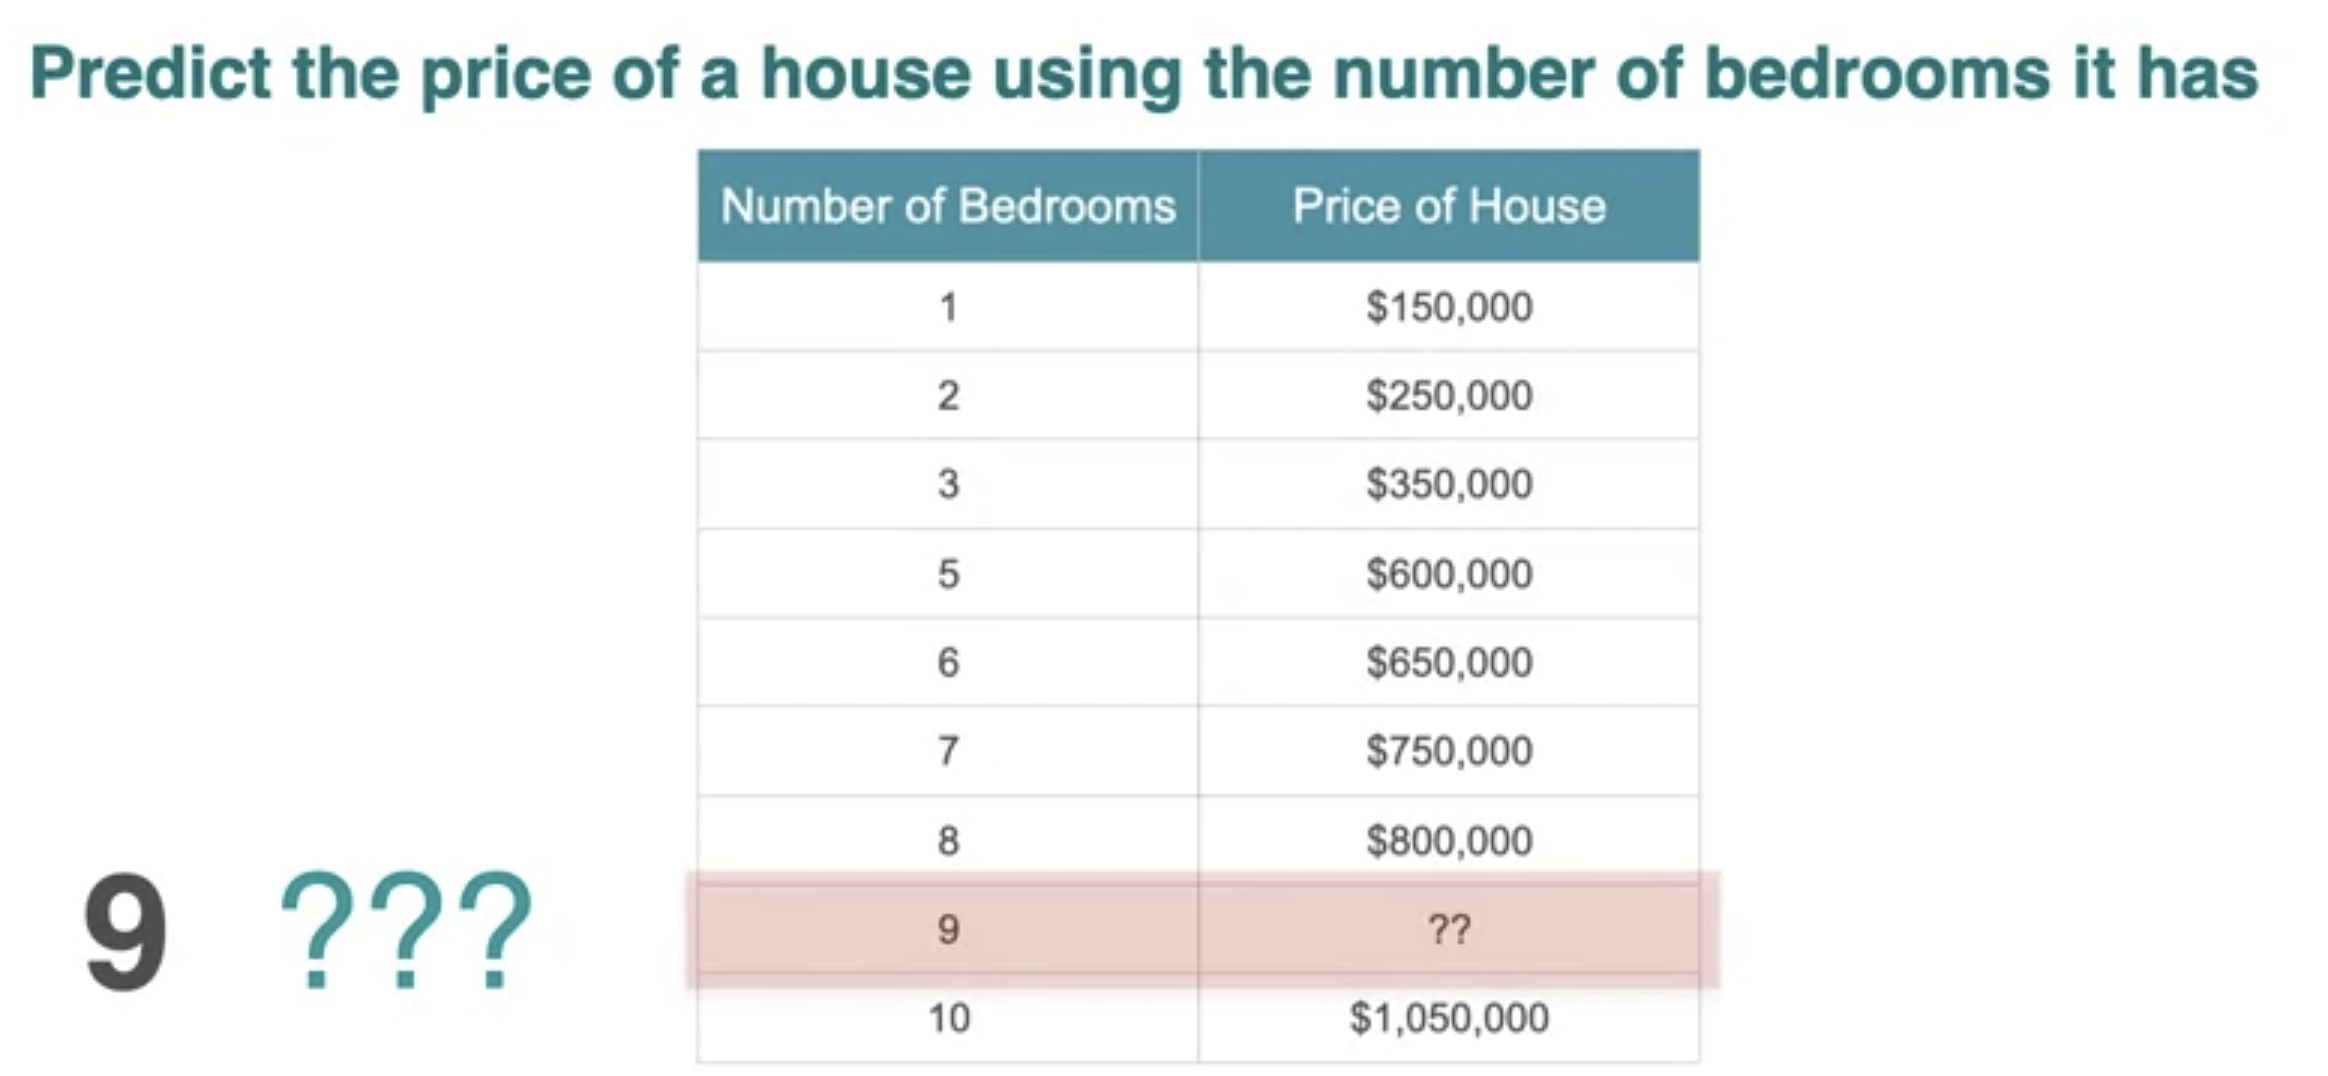



### 2.1 Menyiapkan Data

Kita dapat menyiapkan data dari gambar sebagai array Numpy:

In [ ]:
import numpy as np

# Data: jumlah kamar tidur dan harga rumah (mengabaikan data yang tidak lengkap)
X = np.array([1, 2, 3, 5, 6, 7, 8, 10])  # Jumlah kamar tidur
Y = np.array([150000, 250000, 350000, 600000, 650000, 750000, 800000, 1050000])  # Harga rumah


### 2.2 Menghitung Koefisien Regresi

Dalam regresi linear sederhana, kita ingin menemukan koefisien $a$ (gradien atau slope) dan $b$ (intercept) yang mendefinisikan garis terbaik (best fit line) yang meminimalkan perbedaan (residu) antara nilai prediksi dan nilai aktual dari data kita. Rumus garis regresi linear adalah:

$Y = aX + b \$

Kita dapat menghitung $a$ dan $b$ menggunakan rumus berikut:

$a = \frac{\sum (X - \bar{X})(Y - \bar{Y})}{\sum (X - \bar{X})^2} $

$b = \bar{Y} - a\bar{X} $

di mana:

- $\bar{X}$ adalah rata-rata nilai $X$
- $\bar{Y}$ adalah rata-rata nilai $Y$

Langkah-langkah perhitungan ini dapat diimplementasikan dalam Python menggunakan Numpy sebagai berikut:


In [ ]:
# Menghitung mean dari X dan Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Menghitung koefisien a dan b
a = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
b = Y_mean - a * X_mean


### 2.3 Prediksi dan Visualisasi

Gunakan koefisien untuk memprediksi harga rumah dengan 9 kamar tidur dan plot grafiknya.





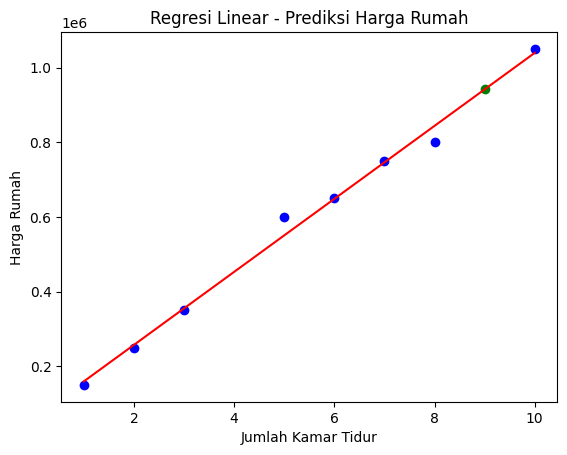

In [ ]:
# Prediksi harga rumah dengan 9 kamar tidur
X_pred = 9
Y_pred = a * X_pred + b

# Visualisasi menggunakan matplotlib (opsional, untuk presentasi)
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue')  # plot titik data asli
plt.plot(X, a * X + b, color='red')  # plot garis regresi
plt.scatter(X_pred, Y_pred, color='green')  # titik prediksi
plt.title('Regresi Linear - Prediksi Harga Rumah')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga Rumah')
plt.show()


### 2.4 Penerapan Kalkulus

Dalam konteks regresi linear, kalkulus diterapkan untuk menemukan nilai koefisien $a$ dan $b$ yang meminimalkan fungsi biaya. Fungsi biaya yang sering digunakan adalah Mean Squared Error (MSE), yang didefinisikan sebagai rata-rata dari kuadrat perbedaan antara nilai aktual dan nilai prediksi. MSE diberikan oleh rumus:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - (\hat{Y_i}))^2$

Di mana:

- $ n$ adalah jumlah sampel.
- $Y_i$  adalah nilai aktual untuk sampel ke- $i$.
-  $\hat{Y_i}$ adalah nilai prediksi untuk sampel ke- $i$, yang dihitung menggunakan model regresi linear $\hat{Y_i} = aX_i + b $.



Untuk menemukan nilai $a$ dan $b$ yang meminimalkan MSE, kita menghitung turunan parsial dari MSE terhadap $a$ dan $b$, dan mengatur mereka agar sama dengan nol (metode ini dikenal sebagai metode least squares). Namun, dalam contoh kita, kita tidak menggunakan gradient descent tetapi menggunakan rumus langsung untuk menemukan $a$ dan $b$.

## 3. Probabilitas dan Statistika

### 3.1 Distribusi Probabilitas
Distribusi probabilitas adalah fondasi dari banyak algoritma machine learning. Sebagai contoh, distribusi Gaussian (atau normal) sering digunakan dalam algoritma seperti Naive Bayes Classifier.

Contoh: Menghitung Peluang dari Distribusi Gaussian

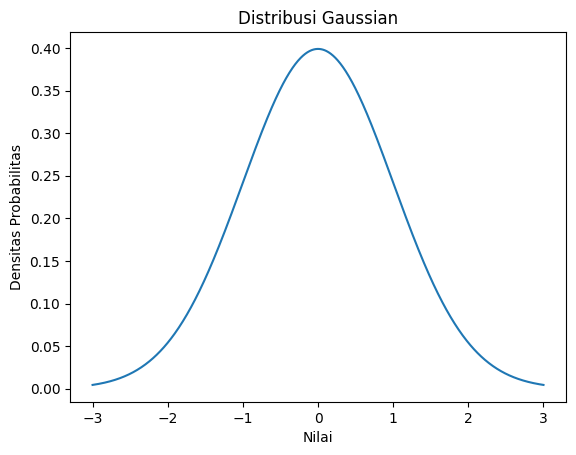

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Definisi mean dan standar deviasi
mean = 0
std_dev = 1

# Membuat nilai x dari -3sd sampai +3sd
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Membuat distribusi Gaussian
y = stats.norm(mean, std_dev).pdf(x)

# Membuat plot
sns.lineplot(x=x, y=y)
plt.title('Distribusi Gaussian')
plt.xlabel('Nilai')
plt.ylabel('Densitas Probabilitas')
plt.show()


Dalam contoh ini, kita mendefinisikan sebuah distribusi Gaussian (disebut juga distribusi normal) dengan mean ($\mu$) 0 dan standar deviasi ($\sigma$) 1. Distribusi ini digambarkan dengan fungsi kepadatan probabilitas (probability density function, PDF):

$$ f(x|\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 } $$

Garis vertikal merah pada plot menunjukkan nilai $x = 0.5$, dan area di bawah kurva ke kiri dari garis ini menggambarkan peluang variabel acak kurang dari atau sama dengan 0.5 dalam distribusi ini.


### 3.2 Deskripsi Statistik
Statistik deskriptif membantu kita memahami dan mendeskripsikan data yang kita miliki.

Contoh: Menghitung Mean dan Standar Deviasi

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


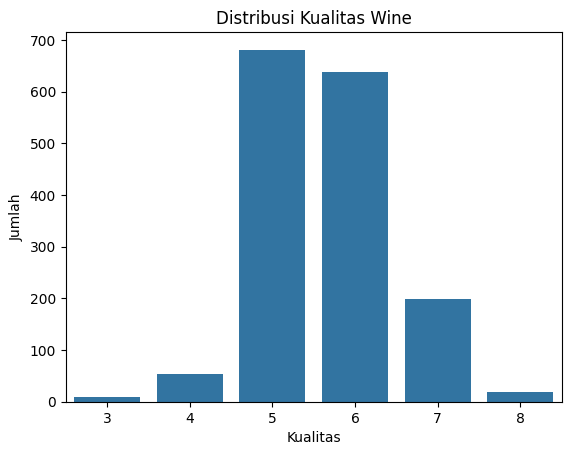

In [ ]:
# Visualisasi distribusi kualitas wine
sns.countplot(x='quality', data=data)
plt.title('Distribusi Kualitas Wine')
plt.xlabel('Kualitas')
plt.ylabel('Jumlah')
plt.show()

### 3.3 Inferensi Statistik
Inferensi statistik memungkinkan kita untuk membuat keputusan atau prediksi dari data yang kita miliki.

Contoh: Uji Hipotesis

In [ ]:
from scipy.stats import binomtest

# Contoh jumlah email dan jumlah email yang merupakan spam
jumlah_email = 1000  # total email dalam dataset
jumlah_spam = 530  # jumlah email yang teridentifikasi sebagai spam

# Melakukan uji hipotesis
p_value = binomtest(jumlah_spam, jumlah_email, p=0.5, alternative='greater')

print(f'P-value: {p_value}')


P-value: BinomTestResult(k=530, n=1000, alternative='greater', statistic=0.53, pvalue=0.03101159754918171)


Berdasarkan nilai p-value yang dihasilkan, kita dapat menarik kesimpulan terkait hipotesis kita:

- Jika p-value < 0.05, kita memiliki cukup bukti untuk menolak Hipotesis Nol dan menerima bahwa proporsi email spam lebih dari 50%.
- Jika p-value >= 0.05, kita tidak memiliki cukup bukti untuk menolak Hipotesis Nol dan harus menerima bahwa proporsi email spam mungkin sama dengan 50%.

### 3.4 Korelasi dan Regresi
Korelasi dan regresi digunakan untuk memahami hubungan antara variabel.

Contoh: Menghitung Korelasi

In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


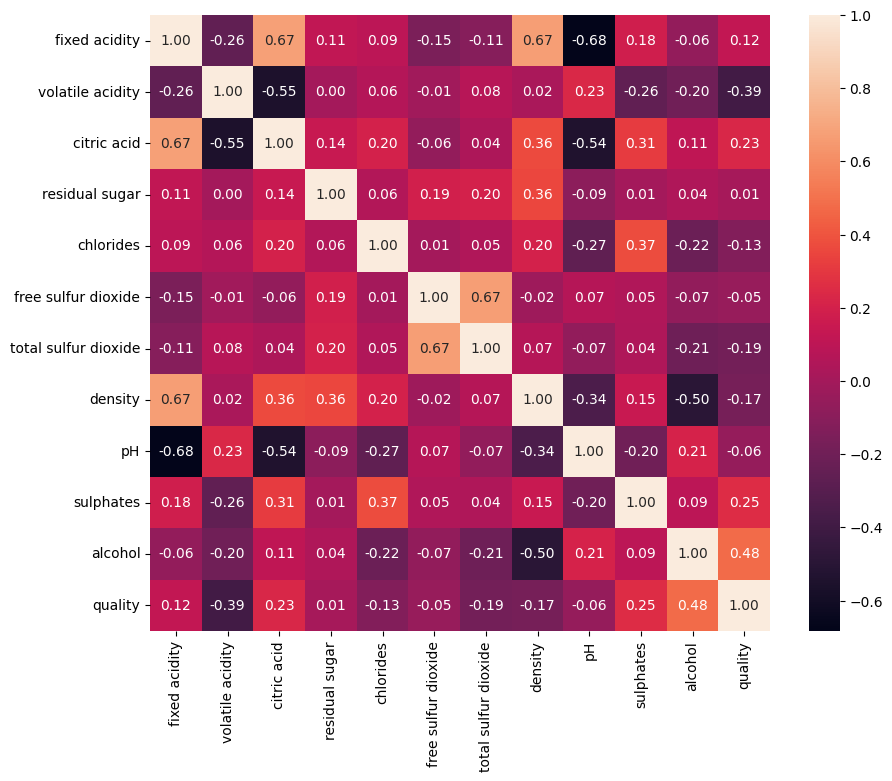

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()